Modelagem da dinâmica longitudinal do protótipo baja


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy.integrate import odeint
from scipy.interpolate import CubicSpline

Forças de Resistência


In [2]:
# Simbolos a serem usados
m, g, theta, p, af, cd, v, cr = sp.symbols('m g theta p af cd v cr')

In [3]:
# Força resistência aerodinâmica
FrA = 0.5 * af * cd * p * (v)**2

FrA

0.5*af*cd*p*v**2

In [4]:
# Força resistência ao rolamento
FrRol = cr * m * g * sp.cos((theta * np.pi) / 180)

FrRol

cr*g*m*cos(0.0174532925199433*theta)

In [5]:
# Força de resistência ao aclive
FrAc = m * g * sp.sin((theta * np.pi) / 180)

FrAc

g*m*sin(0.0174532925199433*theta)

In [6]:
# Força resultante de resistência
FrR = FrA + FrRol + FrAc

FrR

0.5*af*cd*p*v**2 + cr*g*m*cos(0.0174532925199433*theta) + g*m*sin(0.0174532925199433*theta)

Força de Tração


In [7]:
# Força de tração, depende do torque do motor em determinada rotação e da relação de transmissão da cvt na mesma rotação
T, icvt, icx, r = sp.symbols('T icvt icx r')

Ft = (T * icvt * icx)/r

Ft

T*icvt*icx/r

Velocidade da roda

In [8]:
# Calcula a velocidade da roda em função do RPM do motor e da relação de transmissão da cvt
rm = sp.symbols('rpm')

V = ((0.377 * rm * r) / (icvt * icx) )/ 3.6

Relação da CVT


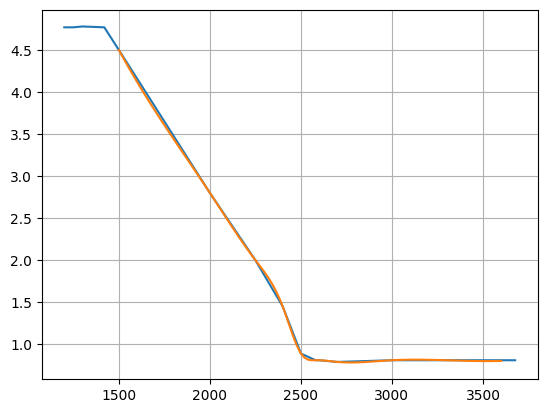

In [9]:
# Dados experimentais

RPM_Motora = [1200,
              1250,
              1300,
              1420,
              1500,
              2000,
              2250,
              2400,
              2500,
              2580,
              2600,
              2700,
              3000,
              3300,
              3677]

RPM_Movida = [251.5,
              262,
              272,
              298,
              333,
              714,
              1125,
              1650,
              2823,
              3200,
              3210,
              3400,
              3703,
              4070,
              4549]

# Relação de transmissão da cvt
rcvt = [round(RPM_Motora[i]/RPM_Movida[i], 2) for i in range(len(RPM_Motora))]

rcvt
# Plotando a relação de transmissão da cvt
plt.plot(RPM_Motora, rcvt)
plt.grid()

# Obtenção da relação de transmissão da cvt em função da rotação do motor (1200 à 3600 RPM) usando spline cúbico
Rcvt = CubicSpline(RPM_Motora, rcvt)

# Plotando a relação de transmissão da cvt obtida
RPM = np.linspace(1500, 3600, 100)

plt.plot(RPM, Rcvt(RPM))

Dados do motor

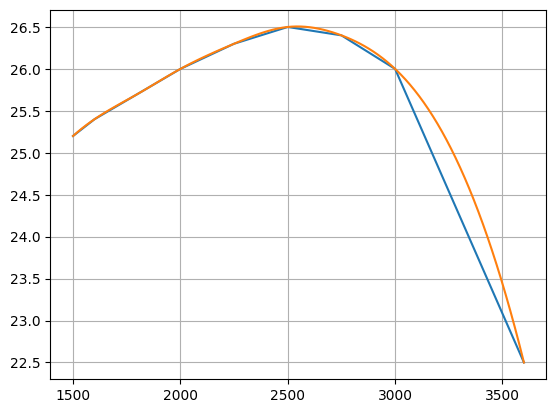

In [10]:
# Curva de torque do motor
torque_Motor = [
    25.2,
    25.4,
    25.7,
    26,  # 2k
    26.3,
    26.5,  # 2,5k
    26.4,
    26,  # 3k
    22.5  # 3,6
]

rpm = [1500, 1600, 1800, 2000, 2250, 2500, 2750, 3000, 3600]

# Obtenção da curva de torque do motor em função da rotação do motor (1200 à 3600 RPM) usando spline cúbico
Tm = CubicSpline(rpm, torque_Motor)

# Plotando a curva de torque do motor 
plt.plot(rpm, torque_Motor)

# Plotando a curva de torque do motor obtida
plt.plot(RPM, Tm(RPM))
plt.grid()

In [11]:
# Equações na forma de função

E_Ft = sp.lambdify([T, icvt, icx, r], Ft)
E_FrR = sp.lambdify([m, g, theta, p, af, cd, v, cr], FrR)
E_FrRol = sp.lambdify([m, g, cr, theta], FrRol)
E_FrA = sp.lambdify([af, cd, p, v], FrA)
E_FrAc = sp.lambdify([m, g, theta], FrAc)
E_V = sp.lambdify([rm, r, icvt, icx], V)


In [12]:
# Dados do veículo

af = 1.08 # m^2
cd = 0.76
r = 0.2667 # m
cr = 0.3
m = 237.6 # kg
icx = 7.2
p = 1.225 # kg/m^3
g = 9.81 # m/s^2
deg = 45
grad = np.tan((deg*np.pi)/180)

3061.4173228346453


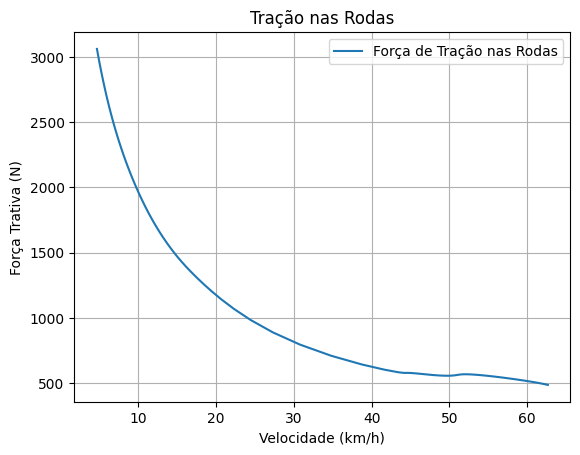

In [13]:
# Plota a força de tração nas rodas em função da velocidade
plt.plot(E_V(RPM, r, Rcvt(RPM), icx)*3.6, E_Ft(Tm(RPM), Rcvt(RPM), icx, r), label='Força de Tração nas Rodas') 

print(max(E_Ft(Tm(RPM), Rcvt(RPM), icx, r)))
plt.title('Tração nas Rodas')
plt.xlabel('Velocidade (km/h)')
plt.ylabel('Força Trativa (N)')
plt.legend()
plt.grid()

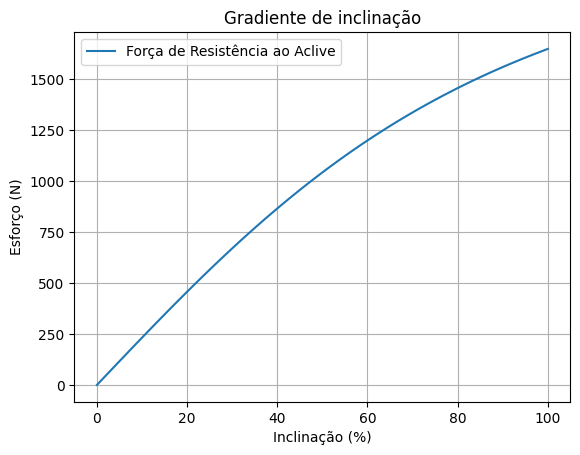

In [14]:
# Plota a resistência ao aclive em função de theta
theta = np.linspace(0, 45, 100)
grad = np.tan((theta*np.pi)/180)*100
plt.plot(grad, E_FrAc(m, g, theta), label='Força de Resistência ao Aclive')

plt.title('Gradiente de inclinação')
plt.xlabel('Inclinação (%)')
plt.ylabel('Esforço (N)')
plt.legend()
plt.grid()

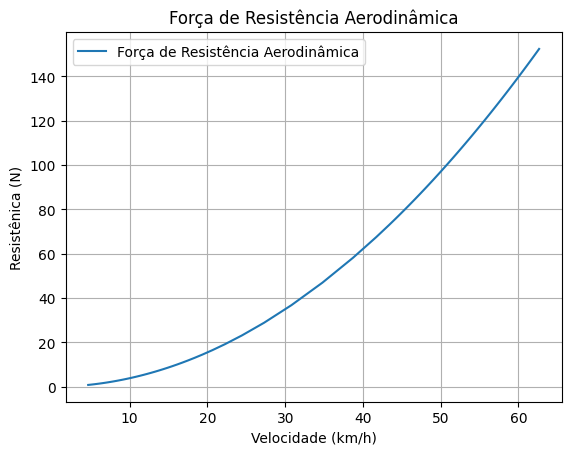

In [15]:
# Plota a força de resistência aerodinâmica em função da velocidade
plt.plot(E_V(RPM, r, Rcvt(RPM), icx)*3.6, E_FrA(af, cd, p, E_V(RPM, r, Rcvt(RPM), icx)), label='Força de Resistência Aerodinâmica')
# plt.plot(E_V(RPM, r, Rcvt(RPM), icx)*3.6, E_FrA(0.908, cd, p, v), label='Força de Resistência Aerodinâmica (Protótipo anterior)')

plt.title('Força de Resistência Aerodinâmica')
plt.xlabel('Velocidade (km/h)')
plt.ylabel('Resistênica (N)')
plt.legend()
plt.grid()

In [25]:
# Esforço máximo de cada força
theta = 18
grad = np.tan((theta*np.pi)/180)*100
rpm = [2000, 3600]
T = Tm(rpm[1])
icvt = Rcvt(rpm[1])
v = E_V(rpm[1], r, icvt, icx)
print(f'Velocidade Máxima: {v*3.6:.2f} km/h')
print(f'Força de Tração à {rpm[0]} RPM: {E_Ft(18.5, Rcvt(rpm[0]), icx, r):.2f} N')
print(f'Força de Tração à {rpm[1]} RPM: {E_Ft(12.6, icvt, icx, r):.2f} N')
print(f'Força de Resistência ao Aclive à {theta}º: {E_FrAc(m, g, theta):.2f} N')
print(f'Força de Resistência ao Rolamento à {theta}º: {E_FrRol(m, g, 0.014, theta):.2f} N')
print(f'Força de Resistência Aerodinâmica à {v*3.6:.2f} km/h: {E_FrA(af, cd, p, v):.2f} N')
print(f'Força de Resistência à {grad:.0f}% e {0} km/h: {E_FrR(m, g, theta, p, af, cd, 0, 0.3):.2f} N')
print(f'Velocidade esperada: {(E_V(rpm[1], r, icvt, icx)*3.6)*0.8:.2f} km/h')

Velocidade Máxima: 62.67 km/h
Força de Tração à 2000 RPM: 1398.43 N
Força de Tração à 3600 RPM: 272.88 N
Força de Resistência ao Aclive à 18º: 720.27 N
Força de Resistência ao Rolamento à 18º: 31.03 N
Força de Resistência Aerodinâmica à 62.67 km/h: 152.35 N
Força de Resistência à 32% e 0 km/h: 1385.31 N
Velocidade esperada: 50.13 km/h
